In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl as xl

In [3]:
col_index = [("100_10", "SD"),("100_10", "GS"),("100_10", "PC"),
             ("100_20", "SD"),("100_20", "GS"),("100_20", "PC"),
             ("100_30", "SD"),("100_30", "GS"),("100_30", "PC"),
             ("100_60", "SD"),("100_60", "GS"),("100_60", "PC"),
             ("200_60", "SD"),("200_60", "GS"),("200_60", "PC"),
             ("300_60", "SD"),("300_60", "GS"),("300_60", "PC"),
             ("400_60", "SD"),("400_60", "GS"),("400_60", "PC"),]


cols = pd.MultiIndex.from_tuples(col_index)

df = pd.DataFrame(0.0,index = range(1,101), columns = cols)
df.head(3)

100_10           100_20           100_30           100_60  ...      200_60  \
      SD   GS   PC     SD   GS   PC     SD   GS   PC     SD  ...   PC     SD   
1    0.0  0.0  0.0    0.0  0.0  0.0    0.0  0.0  0.0    0.0  ...  0.0    0.0   
2    0.0  0.0  0.0    0.0  0.0  0.0    0.0  0.0  0.0    0.0  ...  0.0    0.0   
3    0.0  0.0  0.0    0.0  0.0  0.0    0.0  0.0  0.0    0.0  ...  0.0    0.0   

            300_60           400_60            
    GS   PC     SD   GS   PC     SD   GS   PC  
1  0.0  0.0    0.0  0.0  0.0    0.0  0.0  0.0  
2  0.0  0.0    0.0  0.0  0.0    0.0  0.0  0.0  
3  0.0  0.0    0.0  0.0  0.0    0.0  0.0  0.0  

[3 rows x 21 columns]

In [4]:
sheet_names = ["100_10", "100_20","100_30","100_60","200_60","300_60","400_60"]

wb = xl.load_workbook("Analiz.xlsm")

for sh in sheet_names:
    sheet = wb[sh]
    
    for row in range(1, 201):
        cell = sheet["A" + str(row)]
        if cell.value == None:
            break
        
        if cell.value[3] == "d":
            
            if row < 50:
                seed = int(cell.value[5:7])
            else:
                seed = int(cell.value[5:8])
            
            SD = float(sheet["B" + str(row+1)].value)
            GS = float(sheet["B" + str(row+2)].value)
            PC = round((GS - SD) / SD * 100 , 3)
            
            df.loc[seed, (sh, "SD")] = SD
            df.loc[seed, (sh, "GS")] = GS
            df.loc[seed, (sh, "PC")] = PC

In [5]:
df.head(3)

100_10               100_20               100_30               100_60  ...  \
      SD     GS     PC     SD     GS     PC     SD     GS     PC     SD  ...   
1   0.00  0.000  0.000  0.653  0.661  1.225  0.751  0.761  1.332  0.622  ...   
2   0.00  0.000  0.000  0.761  0.770  1.183  0.000  0.000  0.000  0.000  ...   
3   0.85  0.868  2.118  0.000  0.000  0.000  0.698  0.709  1.576  0.597  ...   

         200_60               300_60               400_60                
      PC     SD     GS     PC     SD     GS     PC     SD     GS     PC  
1  4.984  0.685  0.687  0.292  0.678  0.679  0.147  0.000  0.000  0.000  
2  0.000  0.000  0.000  0.000  0.706  0.710  0.567  0.000  0.000  0.000  
3  4.523  0.000  0.000  0.000  0.000  0.000  0.000  0.765  0.766  0.131  

[3 rows x 21 columns]

In [6]:
diff_list1 = {"100_10" : df["100_10", "PC"].values,
              "100_20" : df["100_20", "PC"].values,
              "100_30" : df["100_30", "PC"].values,
              "100_60" : df["100_60", "PC"].values}

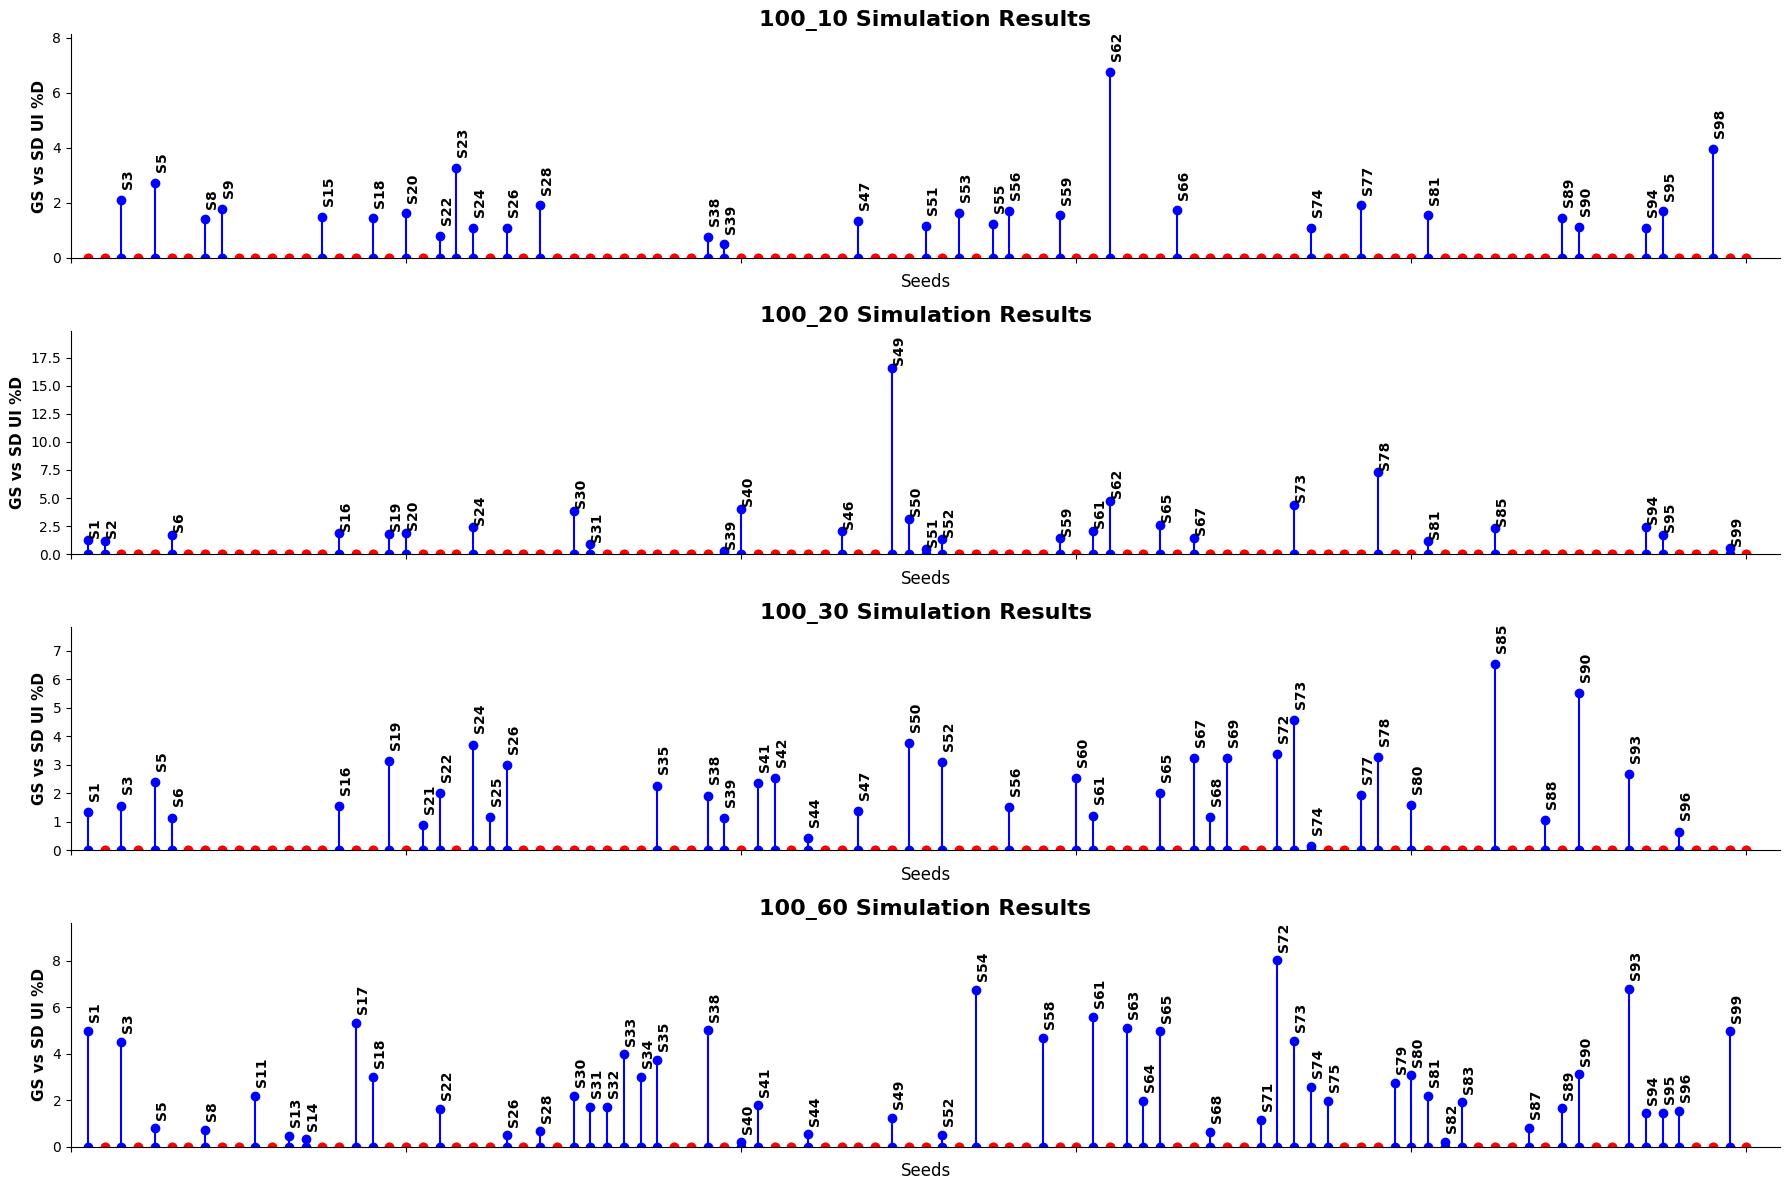

In [10]:
fig, ax = plt.subplots(4,1, figsize = (18,12))

x = 0

for key in diff_list1.keys():
    max_val = np.max(diff_list1[key])
    
    for x_value in range(1,101):
        y_value = diff_list1[key][x_value-1]
        if y_value != 0:
            ax[x].plot([x_value, x_value], [0, y_value], "-ob")
            ax[x].annotate("S{}".format(x_value), (x_value, y_value+0.5), rotation = 90, fontweight = "bold")
        else:
            ax[x].plot([x_value, x_value], [0, y_value], "-or")
            
    ax[x].set_xlim(0, 102)
    ax[x].set_ylim(0, max_val*1.2)
    ax[x].spines['top'].set_visible(False)
    ax[x].spines['right'].set_visible(False)
    ax[x].set_title("{} Simulation Results".format(key), fontsize = 16, fontweight = "bold")
    ax[x].set_xlabel("Seeds", fontsize = 12)
    ax[x].set_ylabel("GS vs SD UI %D", fontsize = 11, fontweight = "bold")
    ax[x].set_xticklabels([])

    plt.tight_layout()
    x+=1

fig.savefig("Algorithm_Simulation_Results_1.png", dpi = 500)

        

In [8]:
diff_list2 = {"100_60" : df["100_60", "PC"].values,
              "200_60" : df["200_60", "PC"].values,
              "300_60" : df["300_60", "PC"].values,
              "400_60" : df["400_60", "PC"].values}

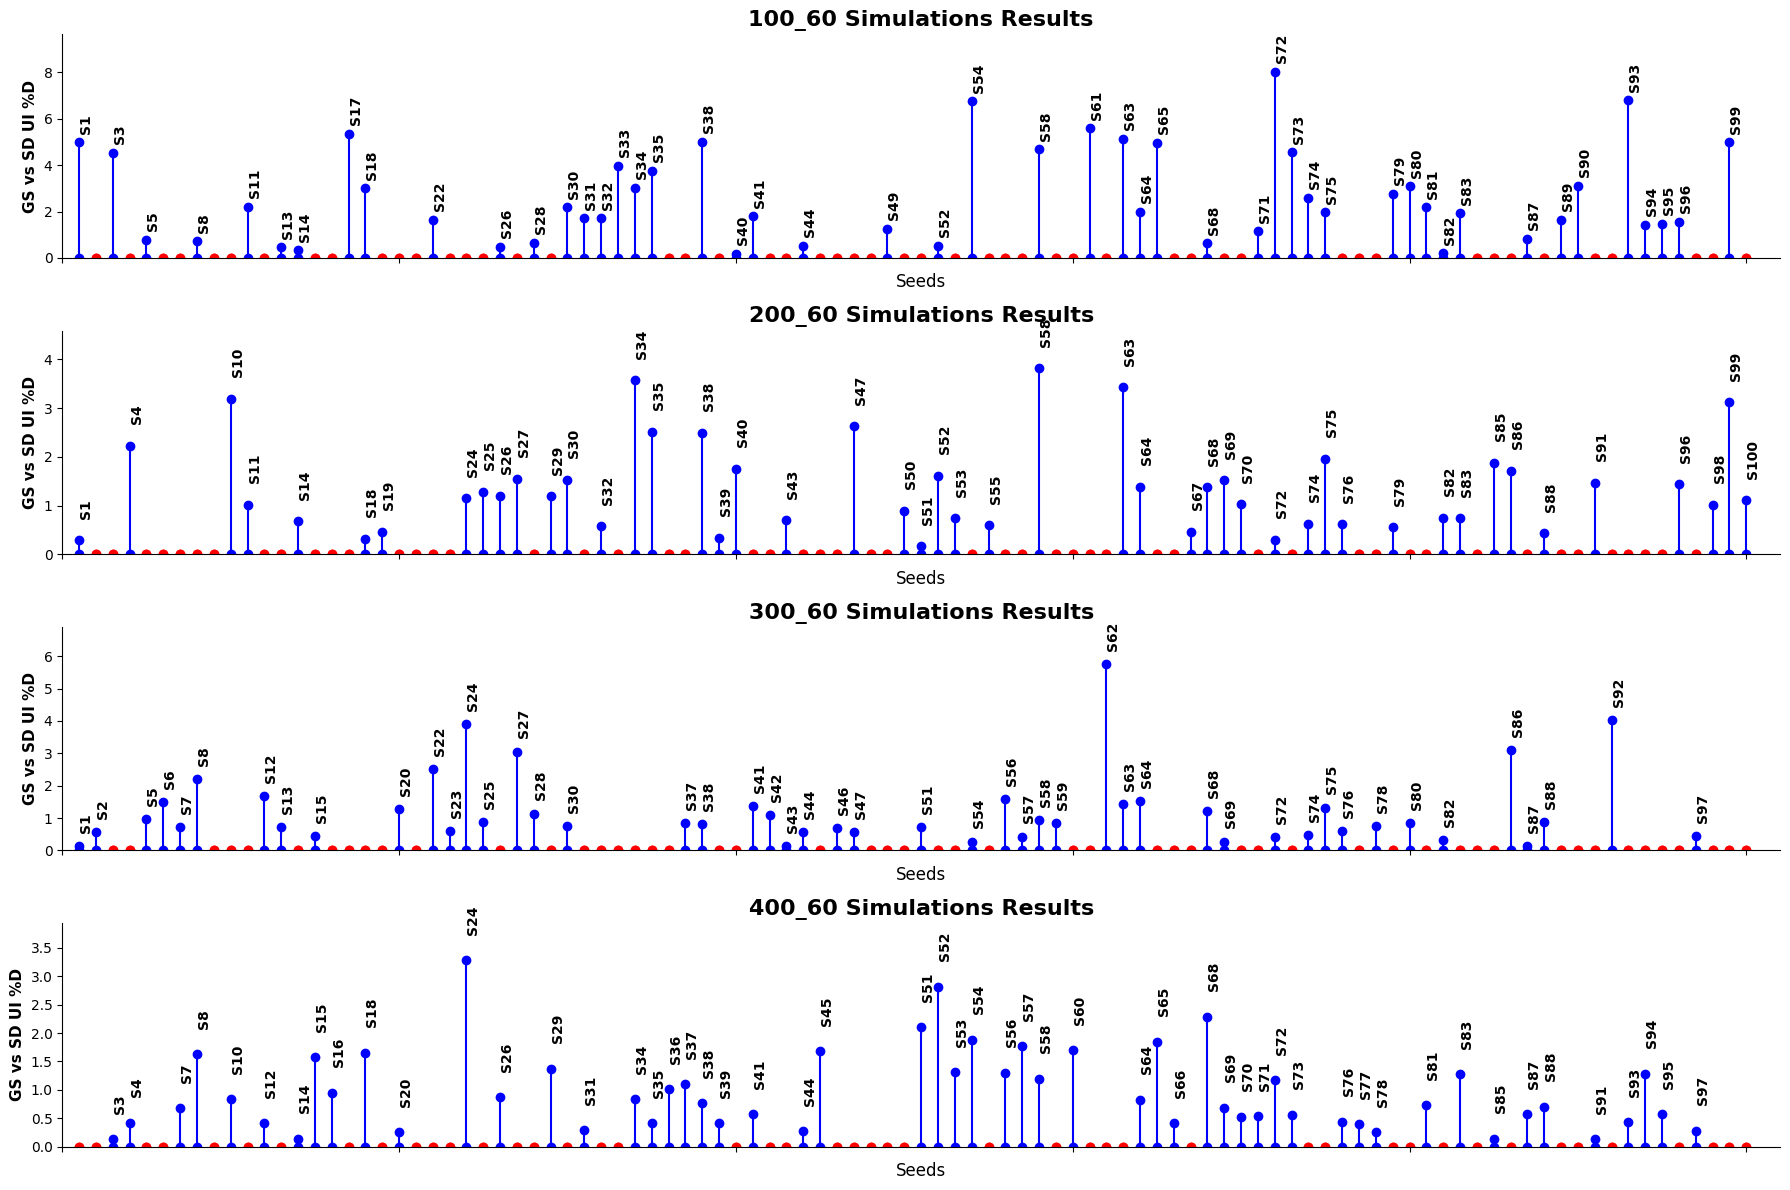

In [11]:
fig, ax = plt.subplots(4,1, figsize = (18,12))

x = 0

for key in diff_list2.keys():
    max_val = np.max(diff_list2[key])
    
    for x_value in range(1,101):
        y_value = diff_list2[key][x_value-1]
        if y_value != 0:
            ax[x].plot([x_value, x_value], [0, y_value], "-ob")
            ax[x].annotate("S{}".format(x_value), (x_value, y_value+0.5), rotation = 90, fontweight = "bold")
        else:
            ax[x].plot([x_value, x_value], [0, y_value], "-or")
            
    ax[x].set_xlim(0, 102)
    ax[x].set_ylim(0, max_val*1.2)
    ax[x].spines['top'].set_visible(False)
    ax[x].spines['right'].set_visible(False)
    ax[x].set_title("{} Simulations Results".format(key), fontsize = 16, fontweight = "bold")
    ax[x].set_xlabel("Seeds", fontsize = 12)
    ax[x].set_ylabel("GS vs SD UI %D", fontsize = 11, fontweight = "bold")
    ax[x].set_xticklabels([])

    plt.tight_layout()
    x+=1


fig.savefig("Algorithm_Simulation_Results_2.png", dpi = 500)